In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
transact = pd.read_csv("Transaction_Data.csv")
# Check the dataset structure
print(transact.head())
print(transact.info())

   Transaction_ID  Customer_ID     Transaction_Date  Transaction_Amount  \
0               1          393  2023-01-01 00:00:00              3472.0   
1               2          826  2023-01-01 01:00:00                 NaN   
2               3          916  2023-01-01 02:00:00                10.0   
3               4          109  2023-01-01 03:00:00                72.0   
4               5          889  2023-01-01 04:00:00              1793.0   

  Transaction_Type  
0         Purchase  
1     Bill Payment  
2         Purchase  
3       Investment  
4       Investment  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5050 entries, 0 to 5049
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Transaction_ID      5050 non-null   int64  
 1   Customer_ID         5050 non-null   int64  
 2   Transaction_Date    5050 non-null   object 
 3   Transaction_Amount  4950 non-null   float64
 4   Transaction_Type  

In [104]:
# Find and remove duplicate rows
duplicates = transact[transact.duplicated()]
print(f"Number of duplicate rows: {duplicates.shape[0]}")

transact_before = transact.shape
transact = transact.drop_duplicates()
transact_after = transact.shape

print(f"Shape before removing duplicates: {transact_before}")
print(f"Shape after removing duplicates: {transact_after}")

Number of duplicate rows: 50
Shape before removing duplicates: (5050, 5)
Shape after removing duplicates: (5000, 5)


In [106]:
# Handle missing values
missing_values = transact.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Transaction_ID          0
Customer_ID             0
Transaction_Date        0
Transaction_Amount    100
Transaction_Type        0
dtype: int64


In [108]:
for column in transact.select_dtypes(include=['float64', 'int64']).columns:
    if column == 'Transaction_Amount':  
        mean_value = round(transact[column].mean(), 2)
        transact[column] = transact[column].fillna(mean_value)
    else:
        transact[column] = transact[column].fillna(transact[column].mean())

print (transact)

      Transaction_ID  Customer_ID     Transaction_Date  Transaction_Amount  \
0                  1          393  2023-01-01 00:00:00             3472.00   
1                  2          826  2023-01-01 01:00:00             3102.05   
2                  3          916  2023-01-01 02:00:00               10.00   
3                  4          109  2023-01-01 03:00:00               72.00   
4                  5          889  2023-01-01 04:00:00             1793.00   
...              ...          ...                  ...                 ...   
4995            4996          175  2023-07-28 03:00:00             2755.00   
4996            4997          338  2023-07-28 04:00:00             3555.00   
4997            4998          694  2023-07-28 05:00:00             3003.00   
4998            4999          940  2023-07-28 06:00:00              790.00   
4999            5000          353  2023-07-28 07:00:00              955.00   

     Transaction_Type  
0            Purchase  
1        Bill P

In [110]:
# Confirm no missing values remain
missing_values_after = transact.isnull().sum()
print("Missing values after imputation:\n", missing_values_after)

Missing values after imputation:
 Transaction_ID        0
Customer_ID           0
Transaction_Date      0
Transaction_Amount    0
Transaction_Type      0
dtype: int64


In [112]:
# Perform one-hot encoding to convert Transaction_Type to numerical
transact_encoded = pd.get_dummies(transact, columns=['Transaction_Type'], prefix='Type', drop_first=False)

# Display the updated dataset structure again to confirm
transact_encoded.head()

,Transaction_ID,Customer_ID,Transaction_Date,Transaction_Amount,Type_Bill Payment,Type_Investment,Type_Loan Payment,Type_Purchase
0,1,393,2023-01-01 00:00:00,3472.00,False,False,False,True
1,2,826,2023-01-01 01:00:00,3102.05,True,False,False,False
2,3,916,2023-01-01 02:00:00,10.00,False,False,False,True
3,4,109,2023-01-01 03:00:00,72.00,False,True,False,False
4,5,889,2023-01-01 04:00:00,1793.00,False,True,False,False


In [90]:
# Convert Transaction_Date to datetime
transact['Transaction_Date'] = pd.to_datetime(transact['Transaction_Date'])

print (transact)

      Transaction_ID  Customer_ID    Transaction_Date  Transaction_Amount  \
0                  1          393 2023-01-01 00:00:00             3472.00   
1                  2          826 2023-01-01 01:00:00             3102.05   
2                  3          916 2023-01-01 02:00:00             2539.00   
3                  4          109 2023-01-01 03:00:00               72.00   
4                  5          889 2023-01-01 04:00:00             1793.00   
...              ...          ...                 ...                 ...   
4995            4996          175 2023-07-28 03:00:00             2755.00   
4996            4997          338 2023-07-28 04:00:00             3555.00   
4997            4998          694 2023-07-28 05:00:00             3003.00   
4998            4999          940 2023-07-28 06:00:00              790.00   
4999            5000          353 2023-07-28 07:00:00              955.00   

     Transaction_Type  
0            Purchase  
1        Bill Payment  
2  

In [114]:
# Calculate skewness for Transaction_Amount 
skewness_transaction_amount = transact[['Transaction_Amount']].skew()

# Display skewness
skewness_transaction_amount

Transaction_Amount    26.403948
dtype: float64

In [116]:
# Calculate IQR for Transaction_Amount
Q1 = transact['Transaction_Amount'].quantile(0.25)
Q3 = transact['Transaction_Amount'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds for Transaction_Amount
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f"IQR-based bounds for outliers: Lower Bound = {lower_bound}, Upper Bound = {upper_bound}")

# Calculate the median of Transaction_Amount
median_value = transact['Transaction_Amount'].median()
print(f"Median value for Transaction_Amount: {median_value}")

# Impute outliers and specific value (10) with the median
transact['Transaction_Amount'] = transact['Transaction_Amount'].apply(
    lambda x: median_value if x < lower_bound or x > upper_bound or x == 10 else x
)

# Confirm the outliers have been handled
remaining_outliers = transact[(transact['Transaction_Amount'] < lower_bound) | (transact['Transaction_Amount'] > upper_bound)]
if remaining_outliers.empty:
    print("All outliers have been successfully handled.")
else:
    print(f"There are still {remaining_outliers.shape[0]} outliers remaining:")
    print(remaining_outliers)

# Display the first few rows of the updated DataFrame
print("\nFirst few rows of the updated DataFrame:")
print(transact.head())

IQR-based bounds for outliers: Lower Bound = -2373.0, Upper Bound = 7315.0
Median value for Transaction_Amount: 2539.0
All outliers have been successfully handled.

First few rows of the updated DataFrame:
   Transaction_ID  Customer_ID     Transaction_Date  Transaction_Amount  \
0               1          393  2023-01-01 00:00:00             3472.00   
1               2          826  2023-01-01 01:00:00             3102.05   
2               3          916  2023-01-01 02:00:00             2539.00   
3               4          109  2023-01-01 03:00:00               72.00   
4               5          889  2023-01-01 04:00:00             1793.00   

  Transaction_Type  
0         Purchase  
1     Bill Payment  
2         Purchase  
3       Investment  
4       Investment  


In [118]:
# Calculate skewness for Transaction_Amount 
skewness_transaction_amount = transact[['Transaction_Amount']].skew()

# Display skewness
skewness_transaction_amount

Transaction_Amount    0.004939
dtype: float64

In [134]:
transact['Transaction_Date'] = pd.to_datetime(transact['Transaction_Date'])

# Aggregate features by Customer_ID
customer_features = transact.groupby('Customer_ID').agg(
    Transactions_Per_Customer=('Customer_ID', 'size'),
    Average_Transaction_Amount=('Transaction_Amount', 'mean'),
    Total_Transaction_Amount=('Transaction_Amount', 'sum'),
    Recency=('Transaction_Date', lambda x: (transact['Transaction_Date'].max() - x.max()).days),
    **{f'Count_{col}': (col, 'sum') for col in transact.columns if col.startswith('Type_')}
).reset_index()

customer_features['Average_Transaction_Amount'] = customer_features['Average_Transaction_Amount'].round(2)
customer_features['Total_Transaction_Amount'] = customer_features['Total_Transaction_Amount'].round(2)

print("\nFinal Cleaned Customer Transactions:")
print(customer_features)

print(customer_transact.columns)


Final Cleaned Customer Transactions:
     Customer_ID  Transactions_Per_Customer  Average_Transaction_Amount  \
0              1                          6                     2806.00   
1              2                          2                     2453.50   
2              3                          1                     1538.00   
3              4                          2                     4147.50   
4              5                          5                     2959.60   
..           ...                        ...                         ...   
988          996                          3                     1924.33   
989          997                          4                     2205.51   
990          998                          5                     2842.20   
991          999                          9                     2662.44   
992         1000                          6                     1608.67   

     Total_Transaction_Amount  Recency  
0                   

In [154]:
# Normalize numerical features
scaler = MinMaxScaler()
numerical_columns = [
    'Transactions_Per_Customer', 
    'Average_Transaction_Amount', 
    'Total_Transaction_Amount', 
    'Recency'
]

customer_features_normalized = customer_features.copy()
customer_features_normalized[numerical_columns] = scaler.fit_transform(customer_features[numerical_columns])

print("\nFirst few rows of normalized customer features:")
print(customer_features_normalized.head())

# Save the dataset to a CSV file
customer_features_normalized.to_csv("cleaned_customer_transactions.csv", index=False)


First few rows of normalized customer features:
   Customer_ID  Transactions_Per_Customer  Average_Transaction_Amount  \
0            1                   0.416667                    0.535373   
1            2                   0.083333                    0.460484   
2            3                   0.000000                    0.265987   
3            4                   0.083333                    0.820374   
4            5                   0.333333                    0.568005   

   Total_Transaction_Amount   Recency  Count_Type_Bill Payment  \
0                  0.447358  0.131980                        3   
1                  0.124909  0.340102                        1   
2                  0.033842  0.761421                        1   
3                  0.216489  0.142132                        0   
4                  0.392269  0.005076                        2   

   Count_Type_Investment  Count_Type_Loan Payment  Count_Type_Purchase  
0                      1                  

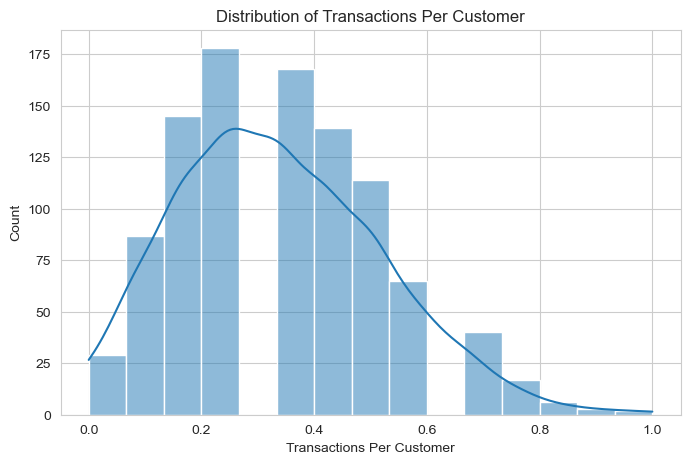

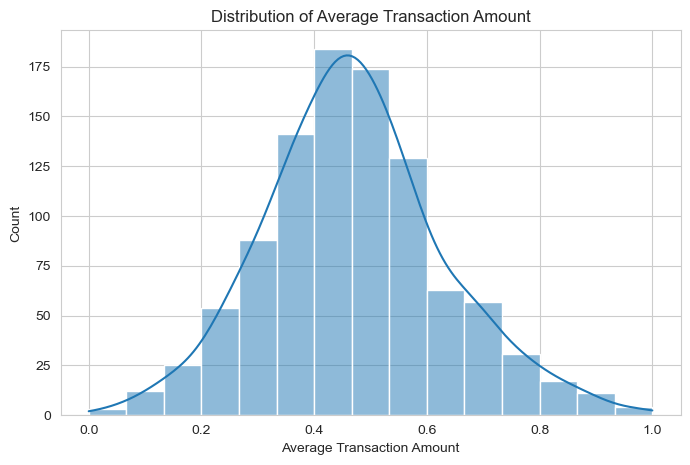

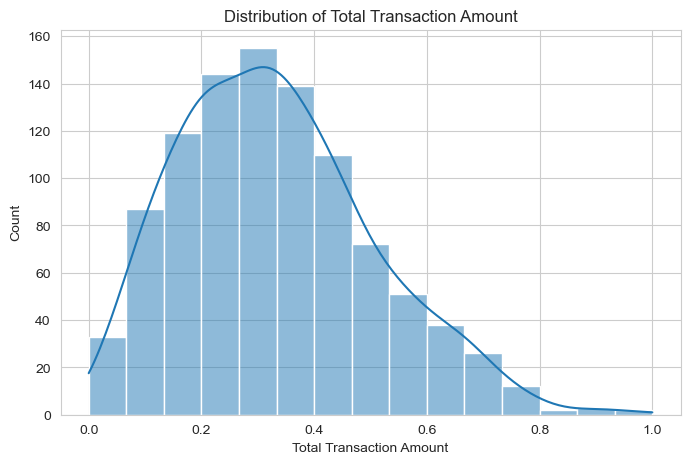

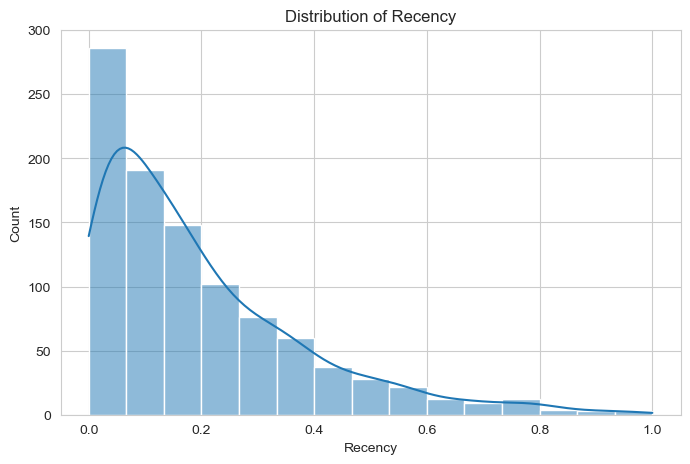

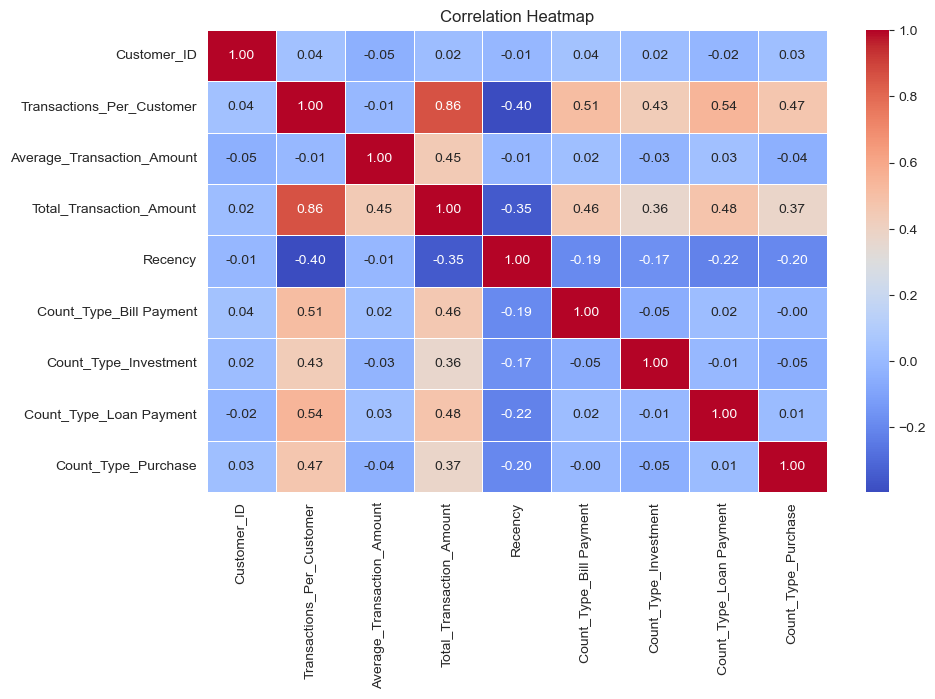

In [156]:
# **Distribution of Transactions per Customer**
# This histogram shows how many transactions each customer has made.
# - A high concentration at lower values suggests that most customers make only a few transactions.
# - A few customers with high transaction counts may indicate VIP users or power shoppers.
# - Identifying frequent vs. occasional users helps tailor **loyalty programs and marketing strategies**.


plt.figure(figsize=(8, 5))
sns.histplot(customer_features_normalized['Transactions_Per_Customer'], bins=15, kde=True)
plt.title("Distribution of Transactions Per Customer")
plt.xlabel("Transactions Per Customer")
plt.ylabel("Count")
plt.show()

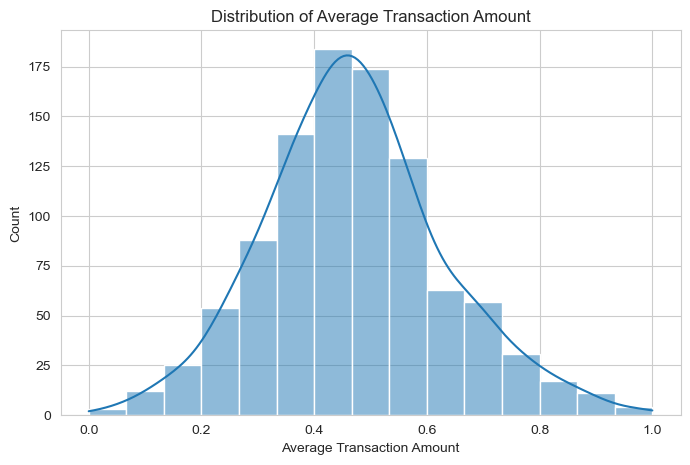

In [158]:
# **Distribution of Average Transaction Amount per Customer**
# This histogram displays the average transaction amount for each customer.
# - A peak at smaller amounts suggests that most customers make low-value transactions.
# - A long tail or right-skewed distribution indicates a few customers making large transactions.
# - This is useful for **identifying high-spending customers** and creating targeted promotions.

plt.figure(figsize=(8, 5))
sns.histplot(customer_features_normalized['Average_Transaction_Amount'], bins=15, kde=True)
plt.title("Distribution of Average Transaction Amount")
plt.xlabel("Average Transaction Amount")
plt.ylabel("Count")
plt.show()

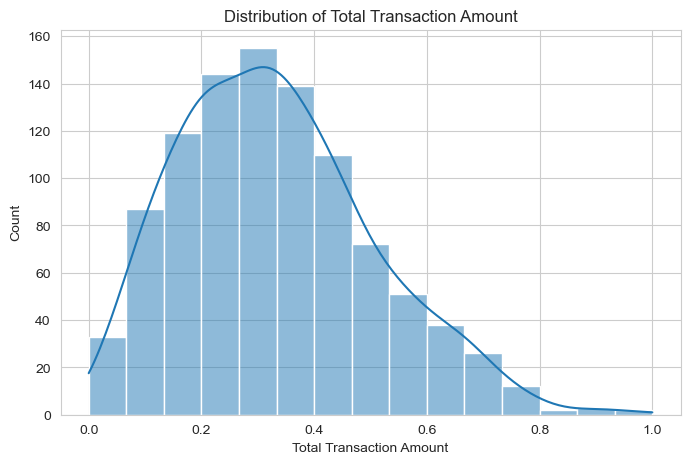

In [160]:
# **Distribution of Total Transaction Amount per Customer**
# This histogram shows how much each customer has spent in total.
# - A concentration at lower amounts means most customers have spent only a small amount.
# - A long right tail suggests that a small number of customers contribute a significant portion of total revenue.
# - This helps in **customer segmentation** to identify big spenders and casual users.

plt.figure(figsize=(8, 5))
sns.histplot(customer_features_normalized['Total_Transaction_Amount'], bins=15, kde=True)
plt.title("Distribution of Total Transaction Amount")
plt.xlabel("Total Transaction Amount")
plt.ylabel("Count")
plt.show()

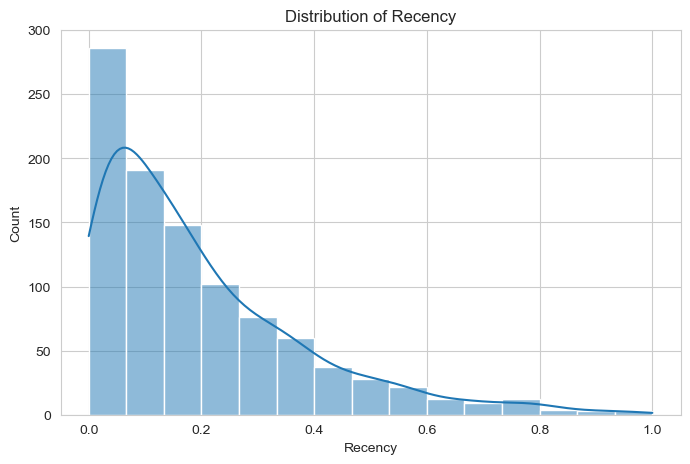

In [162]:
# **Distribution of Recency (Days Since Last Transaction)**
# This histogram shows how recently customers made their last transaction.
# - A peak at lower values means most customers have made recent transactions.
# - A peak at higher values suggests inactive customers who haven't transacted in a while.
# - Understanding recency helps in **designing re-engagement campaigns** to bring back inactive customers.

plt.figure(figsize=(8, 5))
sns.histplot(customer_features_normalized['Recency'], bins=15, kde=True)
plt.title("Distribution of Recency")
plt.xlabel("Recency")
plt.ylabel("Count")
plt.show()

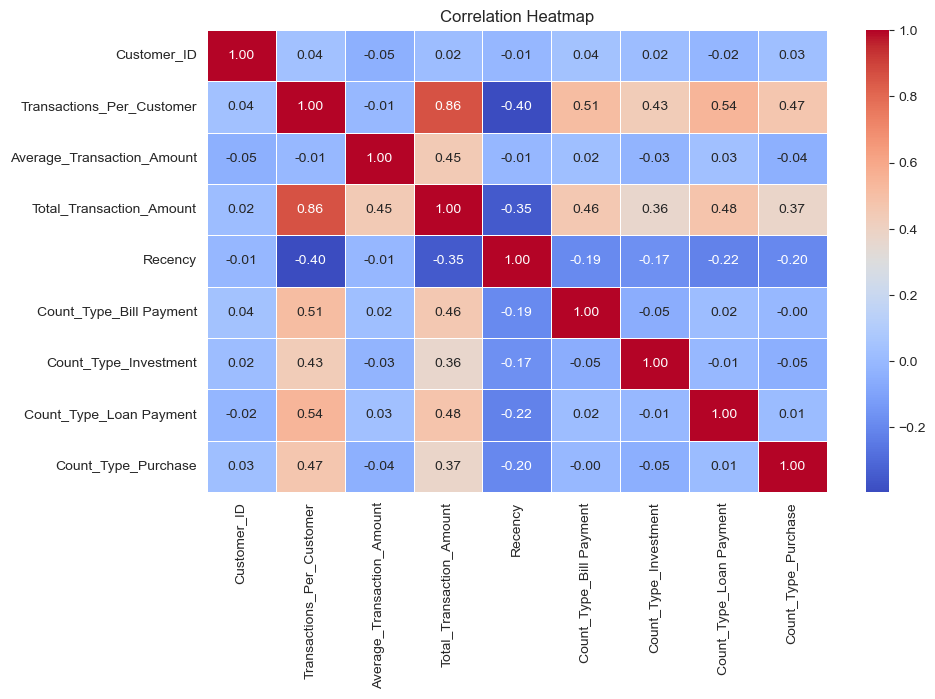

In [164]:
# **Correlation Heatmap**
# This heatmap visualizes relationships between numerical transaction-related features.
# - A strong correlation between **Total Transaction Amount and Number of Transactions** suggests frequent buyers spend more.
# - A weak correlation between **Recency and Total Spend** might indicate that recent users don't necessarily spend more.
# - These insights help in **customer retention and revenue growth strategies**.

plt.figure(figsize=(10, 6))
sns.heatmap(customer_features_normalized.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()